# State Funding Impact on Education: An Exploratory Data Analysis

## Introduction

The relationship between state funding and educational outcomes is a complex and multifaceted issue that sits at the heart of policy-making in the United States. With diverse approaches to education funding across states, understanding how financial investments influence metrics such as graduation rates and cohort sizes is crucial for crafting policies that foster equitable and effective education systems. This Exploratory Data Analysis (EDA) aims to uncover patterns, trends, and insights into how state-level education funding impacts key educational outcomes. By examining variables such as Actual Spending Per Pupil, Teacher Salaries, Total Education Budget, Graduation Rates, and Cohort Sizes, we endeavor to provide a comprehensive overview of the state of education across different regions and over time. Our analysis is rooted in the hypothesis that higher levels of funding are associated with better educational outcomes, though we remain open to discovering nuanced dynamics that challenge or complicate this narrative. Through visualizations, statistical analysis, and data-driven inquiry, this notebook serves as a starting point for deeper investigations into the efficacy of education funding strategies.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure matplotlib plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Set the aesthetics for seaborn plots
sns.set(style="whitegrid")

# Additional imports that might be useful for EDA
import scipy.stats as stats  # For statistical analysis
import statsmodels.api as sm  # For advanced statistical models

# Adjust display settings for easier DataFrame inspection
pd.set_option('display.max_columns', None)  # Show all columns in DataFrames
pd.set_option('display.precision', 2)       # Limit the display precision for floats

# Now, let's import your merged DataFrame
file_path = r"C:\Users\user\Desktop\StateEdFundingImpact\data\merged_state_grads_df.csv"
merged_state_grads_df = pd.read_csv(file_path, index_col='STATE')

# Check the first few rows to confirm successful loading
print(merged_state_grads_df.head())


            Cohort_2015_2016  Rate_2015_2016  Cohort_2016_2017  \
STATE                                                            
ALABAMA             1.46e+05           76.38          1.10e+05   
ALASKA              2.50e+04           62.15          2.58e+04   
ARIZONA             2.02e+05           65.80          2.05e+05   
ARKANSAS            9.49e+04           76.65          1.00e+05   
CALIFORNIA          1.31e+06           76.38          1.26e+06   

            Rate_2016_2017  Cohort_2017_2018  Rate_2017_2018  \
STATE                                                          
ALABAMA              81.77          1.42e+05           77.20   
ALASKA               63.03          2.66e+04           63.01   
ARIZONA              64.63          2.17e+05           65.94   
ARKANSAS             77.27          1.03e+05           75.85   
CALIFORNIA           76.09          1.31e+06           74.95   

            Cohort_2018_2019  Rate_2018_2019  Cohort_2019_2020  \
STATE                 

### Data Profiles

In [3]:
# Display the basic info of the dataset
print(merged_state_grads_df.info())

# Display descriptive statistics for numeric columns
print(merged_state_grads_df.describe())

# For non-numeric data, get a count of unique values
for col in merged_state_grads_df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {merged_state_grads_df[col].nunique()}")


<class 'pandas.core.frame.DataFrame'>
Index: 52 entries, ALABAMA to PUERTO RICO
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cohort_2015_2016  51 non-null     float64
 1   Rate_2015_2016    51 non-null     float64
 2   Cohort_2016_2017  49 non-null     float64
 3   Rate_2016_2017    49 non-null     float64
 4   Cohort_2017_2018  51 non-null     float64
 5   Rate_2017_2018    51 non-null     float64
 6   Cohort_2018_2019  50 non-null     float64
 7   Rate_2018_2019    50 non-null     float64
 8   Cohort_2019_2020  50 non-null     float64
 9   Rate_2019_2020    50 non-null     float64
 10  Cohort_2020_2021  50 non-null     float64
 11  Rate_2020_2021    50 non-null     float64
dtypes: float64(12)
memory usage: 5.3+ KB
None
       Cohort_2015_2016  Rate_2015_2016  Cohort_2016_2017  Rate_2016_2017  \
count          5.10e+01           51.00          4.90e+01           49.00   
mean           1.88e+05     

### Trend Analysis


C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


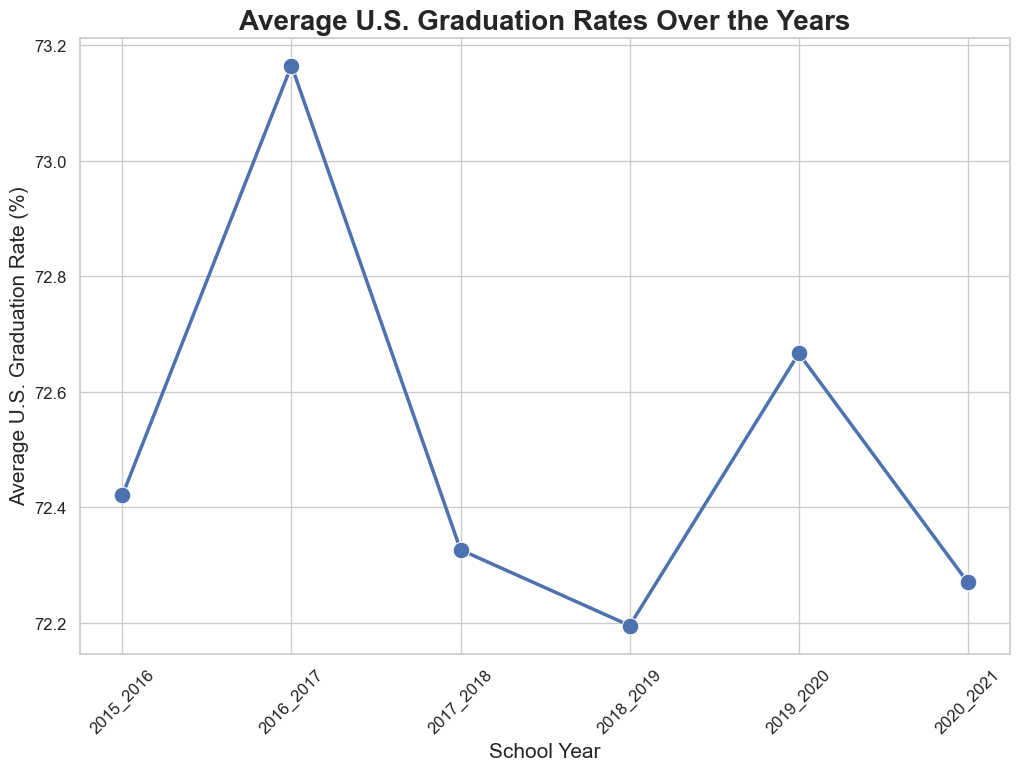

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean graduation rates for each year
average_rates = {
    year: merged_state_grads_df[f'Rate_{year}'].mean() for year in [
        '2015_2016', '2016_2017', '2017_2018', '2018_2019', '2019_2020', '2020_2021'
    ]
}

# Convert the average rates dictionary to a DataFrame for plotting
average_rates_df = pd.DataFrame(list(average_rates.items()), columns=['Year', 'Average Graduation Rate'])

# Plotting
plt.figure(figsize=(12, 8)) 
sns.lineplot(x='Year', y='Average Graduation Rate', data=average_rates_df, marker='o', linewidth=2.5, markersize=12)
plt.title('Average U.S. Graduation Rates Over the Years', fontsize=20, fontweight='bold')  
plt.xlabel('School Year', fontsize=15)
plt.ylabel('Average U.S. Graduation Rate (%)', fontsize=15)  
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)  
sns.set_style("whitegrid")  
plt.show()
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Calculate Year Over Year Changes for Cohort Size & Graduation Rate

In [5]:
# Calculate year-over-year percentage change for cohort sizes and graduation rates
cohort_columns = [f'Cohort_{year}' for year in ['2015_2016', '2016_2017', '2017_2018', '2018_2019', '2019_2020', '2020_2021']]
rate_columns = [f'Rate_{year}' for year in ['2015_2016', '2016_2017', '2017_2018', '2018_2019', '2019_2020', '2020_2021']]

# Using pandas pct_change() function along axis=1 to calculate YoY change across columns
cohort_yoy_change = merged_state_grads_df[cohort_columns].pct_change(axis=1) * 100
rate_yoy_change = merged_state_grads_df[rate_columns].pct_change(axis=1) * 100

# Calculate the mean YoY change for cohorts and rates to visualize national trends
mean_cohort_yoy_change = cohort_yoy_change.mean()
mean_rate_yoy_change = rate_yoy_change.mean()


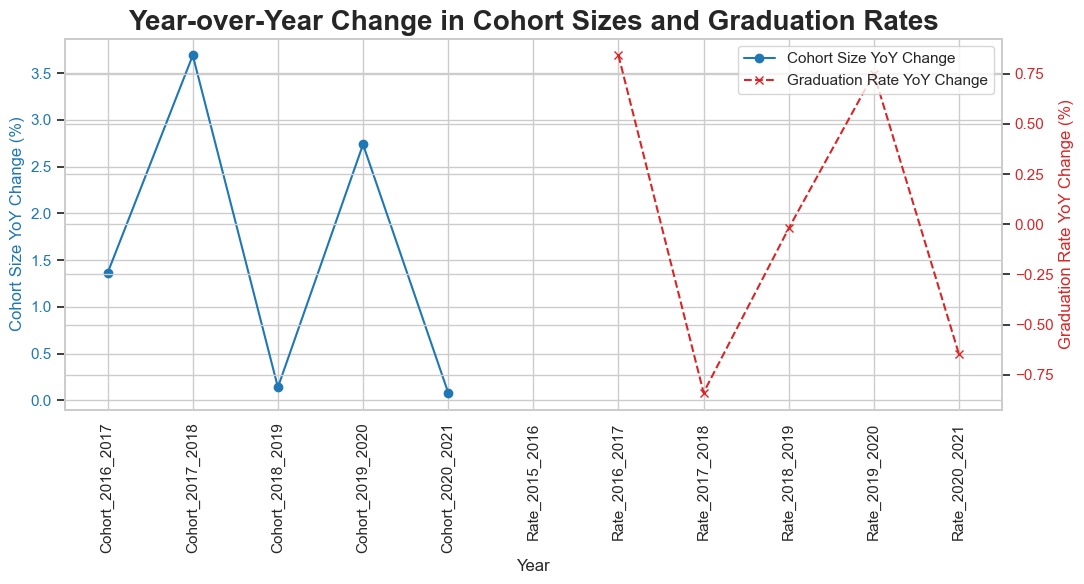

In [6]:
fig, ax1 = plt.subplots(figsize=(11, 6))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Cohort Size YoY Change (%)', color=color)
ax1.plot(mean_cohort_yoy_change.index, mean_cohort_yoy_change, color=color, marker='o', label='Cohort Size YoY Change')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=90)  # Rotate x-ticks vertically

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Graduation Rate YoY Change (%)', color=color)
ax2.plot(mean_rate_yoy_change.index, mean_rate_yoy_change, color=color, marker='x', linestyle='--', label='Graduation Rate YoY Change')
ax2.tick_params(axis='y', labelcolor=color)

# Title and custom legends
plt.title('Year-over-Year Change in Cohort Sizes and Graduation Rates', fontsize=20, fontweight='bold')
fig.tight_layout()
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.show()


### Key Takeaways

#### Cohort Size Variation
- The blue line represents the Year-over-Year (YoY) percentage change in cohort sizes. It appears to fluctuate significantly over the years, with a peak increase around 2018-2019, which suggests a substantial rise in cohort size during that period compared to the previous year.

#### Graduation Rate Changes
- The red dashed line shows the YoY change in graduation rates. There is a notable downward trend starting from 2018-2019 to 2020-2021, indicating that the graduation rates have been decreasing during this period.

#### Comparison of Trends
- The two trends do not seem to move in unison. For example, when the cohort size increases significantly in 2018-2019, the graduation rate doesn't show a corresponding increase; in fact, it decreases. This might suggest that changes in cohort size are not directly influencing the changes in graduation rates, or that other factors are at play.

#### Negative Change in Graduation Rates
- In the final year shown, 2020-2021, there's a particularly steep decrease in graduation rates. This decline could warrant further investigation to understand its causes—potential factors could include changes in educational policy, funding, or external influences such as economic or social disruptions.

#### Volatility
- Both cohort sizes and graduation rates display volatility from year to year. The degree of these changes might require additional context to understand the underlying causes. For instance, policy changes, demographic shifts, or data collection methods might influence these figures.
figures.

In [7]:
# Preparing state_grads_df to merge with state_funding_df
# Adjusting the renaming dictionary to match the actual column names
new_column_names = {
    'Cohort_2016_2017': '2016',
    'Rate_2016_2017': '2016_GradRate',
    'Cohort_2017_2018': '2017',
    'Rate_2017_2018': '2017_GradRate',
    'Cohort_2018_2019': '2018',
    'Rate_2018_2019': '2018_GradRate',
    'Cohort_2019_2020': '2019',
    'Rate_2019_2020': '2019_GradRate',
    'Cohort_2020_2021': '2020',
    'Rate_2020_2021': '2020_GradRate'
}

# Apply the renaming
merged_state_grads_df.rename(columns=new_column_names, inplace=True)

# Since it seems the attempt to drop the 2015 columns didn't execute as expected in your snippet,
# ensure these columns are not present before attempting to drop. If they are, the following line is correct:
# merged_state_grads_df.drop(['Cohort_2015', 'Rate_2015'], axis=1, inplace=True)

# Verify the changes
print(merged_state_grads_df.head())


            Cohort_2015_2016  Rate_2015_2016      2016  2016_GradRate  \
STATE                                                                   
ALABAMA             1.46e+05           76.38  1.10e+05          81.77   
ALASKA              2.50e+04           62.15  2.58e+04          63.03   
ARIZONA             2.02e+05           65.80  2.05e+05          64.63   
ARKANSAS            9.49e+04           76.65  1.00e+05          77.27   
CALIFORNIA          1.31e+06           76.38  1.26e+06          76.09   

                2017  2017_GradRate      2018  2018_GradRate      2019  \
STATE                                                                    
ALABAMA     1.42e+05          77.20  1.34e+05          78.64  1.36e+05   
ALASKA      2.66e+04          63.01  2.62e+04          64.49  2.54e+04   
ARIZONA     2.17e+05          65.94  2.20e+05          65.41  2.30e+05   
ARKANSAS    1.03e+05          75.85  1.08e+05          74.13  1.09e+05   
CALIFORNIA  1.31e+06          74.95  1.29e+0

In [8]:
# Reshaping DF
# Reset the index to ensure 'STATE' is a column
merged_state_grads_df_reset = merged_state_grads_df.reset_index()

# Melt the DataFrame to long format
long_df = pd.melt(merged_state_grads_df_reset, id_vars=['STATE'], var_name='Year_Metric', value_name='Value')

# Extract year and whether it's a GradRate or CohortSize
long_df['YEAR'] = long_df['Year_Metric'].str.extract('(\d+)').astype(int)
long_df['METRIC'] = long_df['Year_Metric'].apply(lambda x: 'Grad_Rate' if 'GradRate' in x else 'Cohort_Size')

# Drop the now unnecessary 'Year_Metric' column
long_df.drop('Year_Metric', axis=1, inplace=True)

# Pivot the long_df to get separate columns for Cohort_Size and Grad_Rate, keeping 'STATE' and 'YEAR' as indices
wide_state_grads_df = long_df.pivot_table(index=['STATE', 'YEAR'], columns='METRIC', values='Value')

# This operation automatically provides 'Cohort_Size' and 'Grad_Rate' as column headers
# And keeps 'STATE' and 'YEAR' as multi-level indices, ready for merging
print(wide_state_grads_df.head())


METRIC        Cohort_Size  Grad_Rate
STATE   YEAR                        
ALABAMA 2015     73029.69        NaN
        2016    110458.00      81.77
        2017    141949.00      77.20
        2018    133900.00      78.64
        2019    136374.00      78.25


In [9]:
# Importing State Funds DF
csv_file_path = r"C:\Users\user\Desktop\StateEdFundingImpact\data\state_funding_df.csv"

state_funding_df = pd.read_csv(csv_file_path, index_col=['STATE', 'YEAR'])
state_funding_df['TotalBudget'] = state_funding_df['ActualSpendingPerPupilState'] * state_funding_df['StateEnrollment']

# Check the first few rows to confirm successful loading
print(state_funding_df.head())


                 Unnamed: 0  StateFIP CensusRegion      CensusDivision  \
STATE      YEAR                                                          
ALABAMA    2016           0         1        South  East South Central   
ALASKA     2016           1         2         West             Pacific   
ARIZONA    2016           2         4         West            Mountain   
ARKANSAS   2016           3         5        South  West South Central   
CALIFORNIA 2016           4         6         West             Pacific   

                 FiscalEffortPercentage  FiscalEffortIncomePercentage  \
STATE      YEAR                                                         
ALABAMA    2016                    0.04                          0.04   
ALASKA     2016                    0.05                          0.06   
ARIZONA    2016                    0.03                          0.03   
ARKANSAS   2016                    0.04                          0.04   
CALIFORNIA 2016                    0.03    

In [10]:
# Drop the Unnamed: 0 column that was created during the CSV export/import process
state_funding_df.drop(columns='Unnamed: 0', inplace=True)

# Check the DataFrame after dropping the column
print(state_funding_df.head(3))


              StateFIP CensusRegion      CensusDivision  \
STATE   YEAR                                              
ALABAMA 2016         1        South  East South Central   
ALASKA  2016         2         West             Pacific   
ARIZONA 2016         4         West            Mountain   

              FiscalEffortPercentage  FiscalEffortIncomePercentage  \
STATE   YEAR                                                         
ALABAMA 2016                    0.04                          0.04   
ALASKA  2016                    0.05                          0.06   
ARIZONA 2016                    0.03                          0.03   

              PredictedCostPerPupilState  ActualSpendingPerPupilState  \
STATE   YEAR                                                            
ALABAMA 2016                    15253.68                      9243.29   
ALASKA  2016                    10487.40                     17631.31   
ARIZONA 2016                    11626.91                     

In [11]:
# MERGE

state_funding_impact_df = wide_state_grads_df.merge(state_funding_df, left_index=True, right_index=True)

# Check the first few rows of the merged DataFrame to verify the merge was successful
print(state_funding_impact_df.head())


              Cohort_Size  Grad_Rate  StateFIP CensusRegion  \
STATE   YEAR                                                  
ALABAMA 2016     110458.0      81.77         1        South   
        2017     141949.0      77.20         1        South   
        2018     133900.0      78.64         1        South   
        2019     136374.0      78.25         1        South   
        2020     134727.0      78.34         1        South   

                  CensusDivision  FiscalEffortPercentage  \
STATE   YEAR                                               
ALABAMA 2016  East South Central                    0.04   
        2017  East South Central                    0.04   
        2018  East South Central                    0.04   
        2019  East South Central                    0.04   
        2020  East South Central                    0.04   

              FiscalEffortIncomePercentage  PredictedCostPerPupilState  \
STATE   YEAR                                                   

In [12]:
# Assuming `final_merged_df` is your merged DataFrame
state_funding_impact_df['AverageTeacherSalary'] = state_funding_impact_df[['TeacherSalary25_30', 'TeacherSalary31_40', 'TeacherSalary41_50', 'TeacherSalary51_60']].mean(axis=1)


In [13]:
# Pearson Correlation between ActualSpendingPerPupilState and Grad_Rate
corr_spending_gradrate = state_funding_impact_df['ActualSpendingPerPupilState'].corr(state_funding_impact_df['Grad_Rate'])
print(f"Correlation between Actual Spending Per Pupil and Graduation Rate: {corr_spending_gradrate}")

# Correlation between AverageTeacherSalary and Grad_Rate
corr_salary_gradrate = state_funding_impact_df['AverageTeacherSalary'].corr(state_funding_impact_df['Grad_Rate'])
print(f"Correlation between Average Teacher Salary and Graduation Rate: {corr_salary_gradrate}")


Correlation between Actual Spending Per Pupil and Graduation Rate: -0.04793025782286544
Correlation between Average Teacher Salary and Graduation Rate: 0.057467592293711234


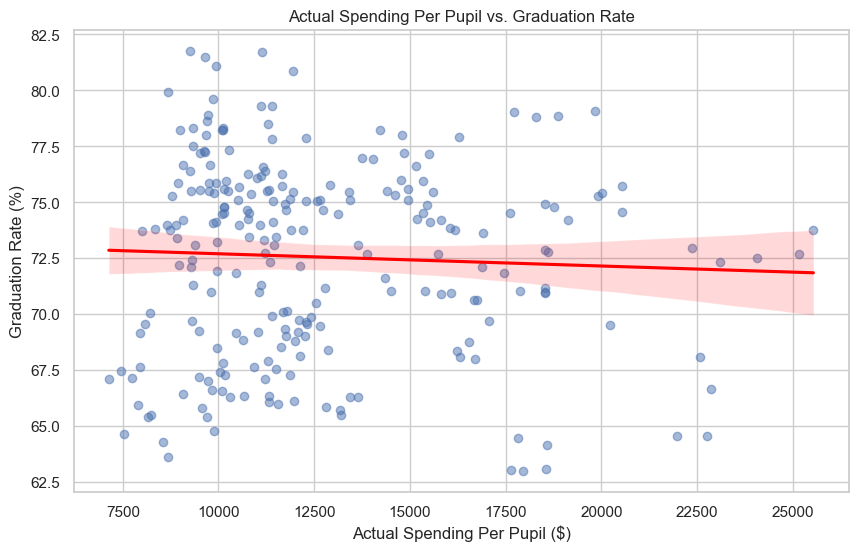

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Scatter plot for ActualSpendingPerPupilState vs. Grad_Rate
plt.figure(figsize=(10, 6))
sns.regplot(x='ActualSpendingPerPupilState', y='Grad_Rate', data=state_funding_impact_df, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Actual Spending Per Pupil vs. Graduation Rate')
plt.xlabel('Actual Spending Per Pupil ($)')
plt.ylabel('Graduation Rate (%)')
plt.show()


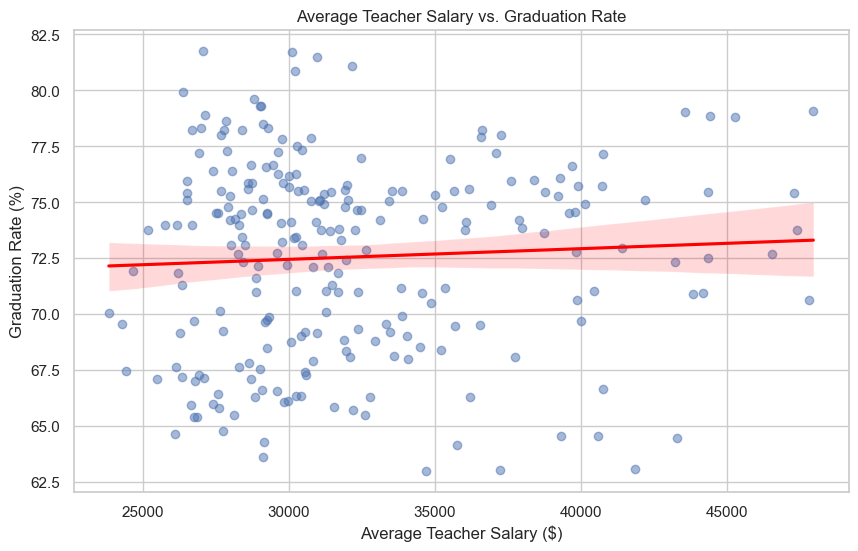

In [15]:
# Scatter plot for AverageTeacherSalary vs. Grad_Rate
plt.figure(figsize=(10, 6))
sns.regplot(x='AverageTeacherSalary', y='Grad_Rate', data=state_funding_impact_df, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Average Teacher Salary vs. Graduation Rate')
plt.xlabel('Average Teacher Salary ($)')
plt.ylabel('Graduation Rate (%)')
plt.show()


**Actual Spending Per Pupil vs. Graduation Rate**

The first plot shows a scatter of points representing the relationship between actual spending per pupil and graduation rates. The red line, which is the line of best fit, appears to be relatively flat, indicating that there might be a very weak or no clear linear correlation between spending per pupil and graduation rates across the states and years represented in your dataset. The shaded area around the line represents the confidence interval for the line of best fit, which seems quite broad, further suggesting a low confidence in any correlation.

**Average Teacher Salary vs. Graduation Rate**

In the second plot, the relationship between average teacher salary and graduation rates is displayed. The line of best fit has a slight positive slope, indicating a potential weak positive correlation between average teacher salary and graduation rates. However, the confidence interval (shaded area) is also broad, suggesting that the correlation is not very strong and there is variability that is not captured by a simple linear relationship.

**Summary of Findings**

- **Spending Per Pupil:** The lack of a pronounced slope in the first plot suggests that simply spending more per pupil may not be strongly associated with higher graduation rates. This could imply that other factors might be at play in influencing graduation rates beyond per-pupil spending.

- **Teacher Salary:** The second plot suggests a slightly more positive relationship between teacher salary and graduation rates, but the wide confidence interval implies that the relationship is not consistent across different contexts within the dataset.

**Considerations**

It is important to note that while these plots show the linear relationship between the variables, they do not account for other factors that may influence graduation rates. Additionally, the presence of any outliers or influential points could affect the line of best fit. Further statistical analysis, such as multiple regression, might be necessary to control for other variables and better understand the underlying dynamics.
ng dynamics.

Correlation between Total Education Budget and Graduation Rate: 0.2917333116990473


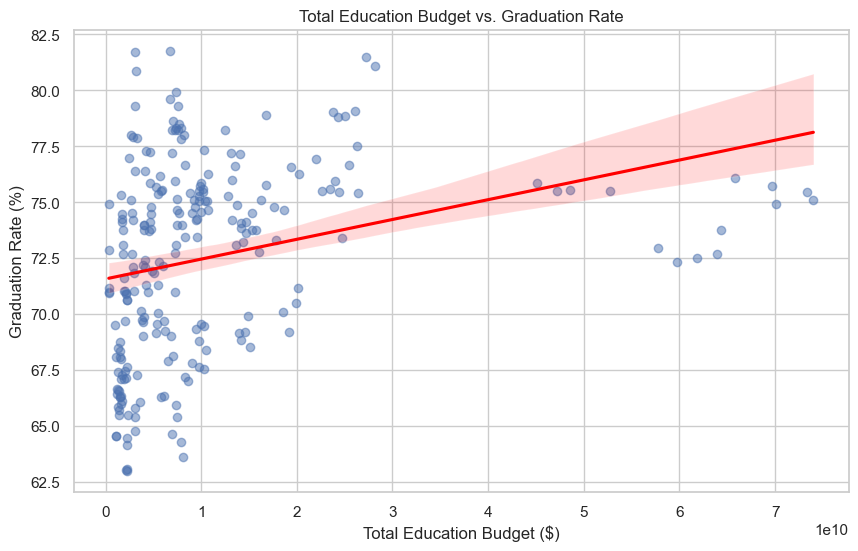

In [16]:
# correlation analysis between 'TotalBudget' and 'Grad_Rate'
corr_budget_gradrate = state_funding_impact_df['TotalBudget'].corr(state_funding_impact_df['Grad_Rate'])
print(f"Correlation between Total Education Budget and Graduation Rate: {corr_budget_gradrate}")

# And create a scatter plot to visualize this relationship
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.regplot(x='TotalBudget', y='Grad_Rate', data=state_funding_impact_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Total Education Budget vs. Graduation Rate')
plt.xlabel('Total Education Budget ($)')
plt.ylabel('Graduation Rate (%)')
plt.show()

**Positive Trend:** The red line of best fit has a positive slope, which indicates that there is a general trend showing higher graduation rates are associated with larger total education budgets across the states and years included in the dataset.

**Variability:** Despite the positive trend, there's considerable scatter around the regression line, suggesting variability in graduation rates that isn't explained solely by changes in the total education budget. This indicates that other factors might influence graduation rates alongside budgetary considerations.

**Confidence Interval:** The shaded area represents the confidence interval around the regression line. While the interval is fairly wide, the fact that it does not include a horizontal line (which would indicate no relationship) suggests that the positive correlation is statistically significant, albeit with a degree of uncertainty.

**Outliers:** There appear to be some potential outliers, particularly at the higher end of the budget scale, that do not follow the overall trend. These could be cases where high budgets do not correspond to proportionally high graduation rates, or vice versa.

**Strength of Relationship:** The slope of the line indicates the relationship's strength, and while there's a positive association, the spread of the data points implies that the total education budget is not the only factor affecting graduation rates. The budget may contribute to graduation rates but is not the sole determinant.
ion rates.

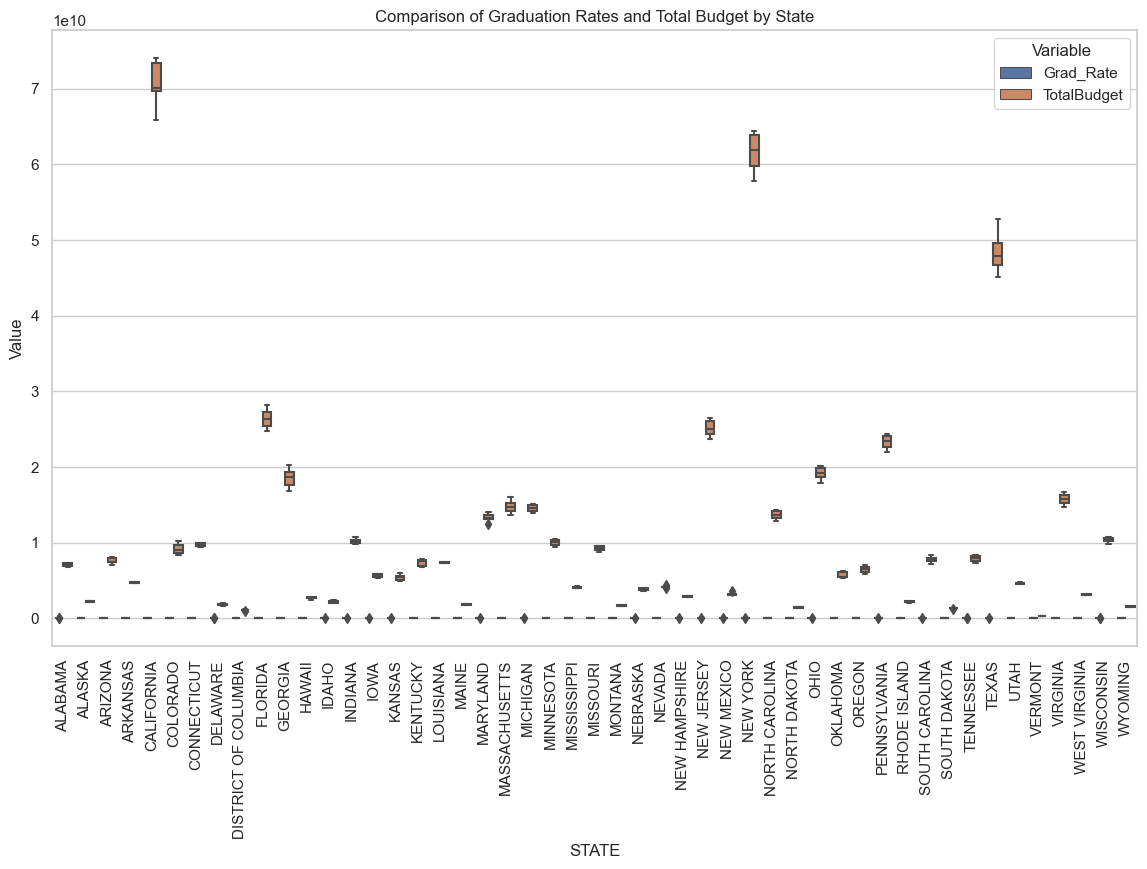

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index so 'STATE' and 'YEAR' become columns
state_funding_impact_df_reset = state_funding_impact_df.reset_index()

# Melt the reset DataFrame to long format for easy plotting with seaborn
melted_df = state_funding_impact_df_reset.melt(id_vars=['STATE', 'YEAR'], value_vars=['Grad_Rate', 'TotalBudget'], var_name='Variable', value_name='Value')

# Create side-by-side boxplots
plt.figure(figsize=(14, 8))
sns.boxplot(x='STATE', y='Value', hue='Variable', data=melted_df)
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.title('Comparison of Graduation Rates and Total Budget by State')
plt.show()
# Save the melted DataFrame to a new CSV file
melted_df.to_csv('state_funding_impact_melted.csv', index=False)
